<a href="https://colab.research.google.com/github/crusnic-corp/BN-AuthProf/blob/main/Code/BN_AuthProf_Age_Gender_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enabling GPU

In [ ]:
!nvidia-smi

Tue Oct  3 13:09:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing the Libraries

In [ ]:
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 58.7 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=3b85080eb5b9ee23c52fe3cc7c6605b136718305382e20b8e39483c4440a3097
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [ ]:
# Importing the libraries for preprocessing
import nltk
import string
import re
import math
from tensorflow import keras
from bnlp import NLTKTokenizer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dense, LSTM, Bidirectional
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
from sklearn.metrics import classification_report

# Preprocessing

In [ ]:
def pre_processing(documents):
  '''This function calls all the pre-processing submodules'''

  documents = remove_english(documents)
  documents = remove_whitespace(documents)
  documents = remove_hashtag(documents)
  documents = remove_urls(documents)
  documents = remove_special_character(documents)
  documents = remove_newline(documents)
  documents = bnlp_word(documents)
  # documents = bnlp_sentence(documents)
  # documents = from_text_into_sequence(documents)
  return documents

In [ ]:
#-----Text to Sequence-----#
def from_text_into_sequence(document):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(document)
  return tokenizer.texts_to_sequences(document)

In [ ]:
#-----Word Tokenization-----#
def bnlp_word(data):
  '''This function removes HashTag # from the entire dataset'''
  bnlp_data = []
  bnltk = NLTKTokenizer()

  for line in data:
    bnlp_data.append(bnltk.word_tokenize(line))

  return bnlp_data

In [ ]:
#-----Sentence Tokenization-----#
def bnlp_sentence(data):
  '''This function removes HashTag # from the entire dataset'''
  bnlp_data = []
  bnltk = NLTKTokenizer()

  for line in data:
    bnlp_data.append(bnltk.sentence_tokenize(line))

  return bnlp_data

In [ ]:
#-----Removing English Alphabets-----#
def remove_english(data):
  '''This function removes english from text '''
  english_removed_data = []
  for line in data:
    english_removed_data.append(re.sub('[A-Za-z]', '', line))
  return english_removed_data

In [ ]:
#-----Removing Whitespace-----#
def remove_whitespace(data):
  '''This function removes multiple whitespaces and replace them with a single whitespace'''
  whitespace_removed_data = []

  for line in data:
    whitespace_removed_data.append(" ".join(line.split()))

  return whitespace_removed_data

In [ ]:
#-----Removing Hashtag-----#
def remove_hashtag(data):
  '''This function removes HashTag # from the entire dataset'''
  hashtag_removed_data = []

  # map hashtag to space
  translator = str.maketrans('#', ' '*len('#'), '')

  for line in data:
    hashtag_removed_data.append(line.translate(translator))

  return hashtag_removed_data

In [ ]:
#-----Removing URLs-----#
def remove_urls(data):
  url_removed_data = []

  for line in data:
    url_removed_data.append(re.sub('http[s]?://\S+', '', line))

  return url_removed_data

In [ ]:
#-----Removing Special Character-----#
def remove_special_character(data):
  special_character_removed_data = []

  for line in data:
    special_character_removed_data.append(re.sub('[!,*)@%(&$_?.^/<|>+-{=~`}]', '', line))

  return special_character_removed_data

In [ ]:
#-----Removing Newline-----#
def remove_newline(data):
  newline_removed_data = []

  for line in data:
    newline_removed_data.append(re.sub('\n', '', line))

  return newline_removed_data

In [ ]:
def combine_tokens(data):
  return [s for S in data for s in S]

In [ ]:
def identity(X):
  return X

In [ ]:
def join_words(doc):
  tmp_doc = []
  for sent in doc:
    tmp_doc.append(' '.join(sent))

  # print(len(tmp_doc))
  return tmp_doc

# Mounting data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/BN-AuthProf_Dataset

/content/drive/.shortcut-targets-by-id/1jftPvn0FbUItDzJ1LSOelGKwEFTbAqpJ/Project_Bangla_Author_Profiling/Project/BN-AuthProf_Dataset


In [ ]:
# copying the dataset into colab local directory (for faster execution)
zip_path = 'BN-AuthProf_Dataset.zip'
!cp "{zip_path}" .
!unzip -q BN-AuthProf_Dataset.zip

cp: 'BN-AuthProf_Dataset.zip' and './BN-AuthProf_Dataset.zip' are the same file
replace BN-AuthProf_Dataset/Exp_Dataset/Age/Train/493.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


#Gender Classification

##Extracting Label

In [ ]:
# Getting the #Truth file in to an array

train_truth_data = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Train/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    train_truth_data.append(line)

dev_truth_data = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Dev/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    dev_truth_data.append(line)

test_truth_data = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Test/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    test_truth_data.append(line)

In [ ]:
# Train Truth Data
train_ids = []
train_gender = []

for line in train_truth_data:
  splitted_line = line.strip().split(':::', 3)
  train_ids.append(splitted_line[0])
  train_gender.append(splitted_line[1])


train_gender_dictionary = { 'M' :0, 'F' :1}
train_gender_labels= [train_gender_dictionary[i] for i in train_gender]

# Dev Truth Data
dev_ids = []
dev_gender = []

for line in dev_truth_data:
  splitted_line = line.strip().split(':::', 3)
  dev_ids.append(splitted_line[0])
  dev_gender.append(splitted_line[1])


dev_gender_dictionary = { 'M' :0, 'F' :1}
dev_gender_labels= [dev_gender_dictionary[i] for i in dev_gender]

# Test Truth Data
test_ids = []
test_gender = []

for line in test_truth_data:
  splitted_line = line.strip().split(':::', 3)
  test_ids.append(splitted_line[0])
  test_gender.append(splitted_line[1])


test_gender_dictionary = { 'M' :0, 'F' :1}
test_gender_labels= [test_gender_dictionary[i] for i in test_gender]


##Extracting Data

In [ ]:
# Train Data
data_train = []
train_data_trial = []

for i in range(0,454):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Train/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_train.append(line)

  len_of_data_train = len(data_train)
  train_data_trial.append(data_train[:len_of_data_train])
  data_train.clear()

In [ ]:
# Dev Data
data_dev = []
dev_data_trial = []

for i in range(0,300):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Dev/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_dev.append(line)

  len_of_data_dev = len(data_dev)
  dev_data_trial.append(data_dev[:len_of_data_dev])
  data_dev.clear()

In [ ]:
# Test Data
data_test = []
test_data_trial = []

for i in range(0,300):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Gender/Test/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_test.append(line)

  len_of_data_test = len(data_test)
  test_data_trial.append(data_test[:len_of_data_test])
  data_test.clear()

## Preprocessing train data, test data and dev data

In [ ]:
test_data = []
dev_data = []
train_data = []

for line in test_data_trial:
  test_data.append(combine_tokens(pre_processing(line)))

for line in dev_data_trial:
  dev_data.append(combine_tokens(pre_processing(line)))

for line in train_data_trial:
  train_data.append(combine_tokens(pre_processing(line)))



##SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                           tokenizer = identity, ngram_range = (2,3))
  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='char',
                           tokenizer = identity, ngram_range = (1,1))
  return vec

In [ ]:
# calls the vectorization function
vec = vec_tfidf(tfidf = True)


# combines the vectorizer with the SVM classifier
classifier_count = Pipeline([('vec', vec),
                       ('cls', SVC(kernel='poly'))])


# fit classifier to training set
classifier_count.fit(train_data, train_gender_labels)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(2, 3),
                                 preprocessor=<function identity at 0x7f2c9f0a5630>,
                                 tokenizer=<function identity at 0x7f2c9f0a5630>)),
                ('cls', SVC(kernel='poly'))])

In [ ]:
# make predictions on dev test
prediction = classifier_count.predict(test_data)

# compute and print accuracy score
print("SVM Accuracy = ", accuracy_score(test_gender_labels, prediction))
print()

print(classification_report(test_gender_labels, prediction, labels=classifier_count.classes_, digits=3))

SVM Accuracy =  0.8066666666666666

              precision    recall  f1-score   support

           0      0.796     1.000     0.887       227
           1      1.000     0.205     0.341        73

    accuracy                          0.807       300
   macro avg      0.898     0.603     0.614       300
weighted avg      0.846     0.807     0.754       300



In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(
    test_gender_labels,
    prediction,
    pos_label=None,
    sample_weight=None,
)

In [ ]:
precision.shape, recall.shape, thresholds.shape

((3,), (3,), (2,))

In [ ]:
import matplotlib.pyplot as plt

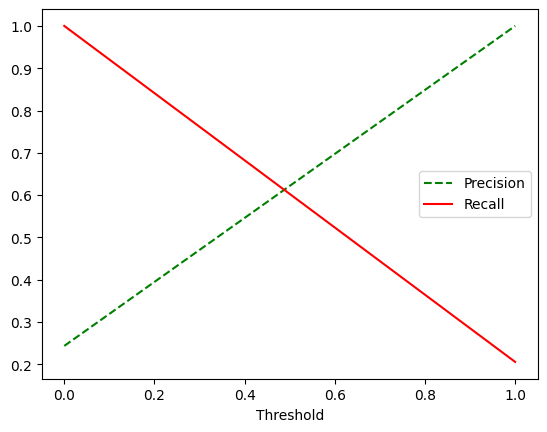

In [ ]:
plt.plot(thresholds, precision[:-1], "g--", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.show()

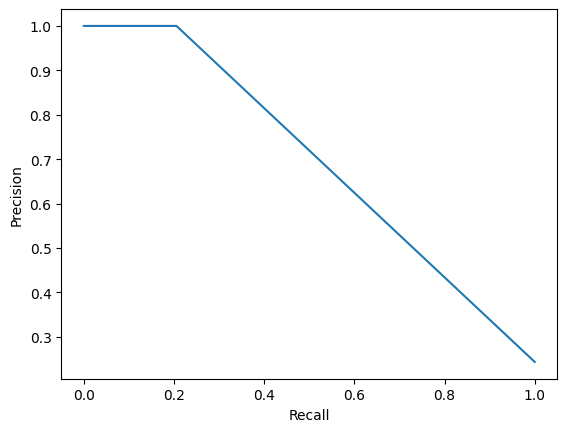

In [ ]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
predict_actual = classifier_count.predict(test_data)       # Predict using classifier.
accuracy_actual = classifier_count.score(test_data, test_gender_labels)
classification_report_actual = classification_report(test_gender_labels, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0]
0.8066666666666666
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       227
           1       1.00      0.21      0.34        73

    accuracy                           0.81       300
   macro avg       0.90      0.60      0.61       300
weighted avg       0.85      0.81      0.75       300



In [ ]:
df = classifier_count.decision_function(test_data)

# Set the value of decision threshold.
decision_teshold = -2.130047196515009

# Desired prediction to increase precision value.
desired_predict =[]

# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in df:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)

In [ ]:
print("old precision value:", precision_score(test_gender_labels, predict_actual))
# New precision Value
print("new precision value:", precision_score(test_gender_labels, desired_predict))

old precision value: 1.0
new precision value: 0.24333333333333335


SVM
[[227   0]
 [ 58  15]]
Normalized confusion matrix
[[1.         0.        ]
 [0.79452055 0.20547945]]


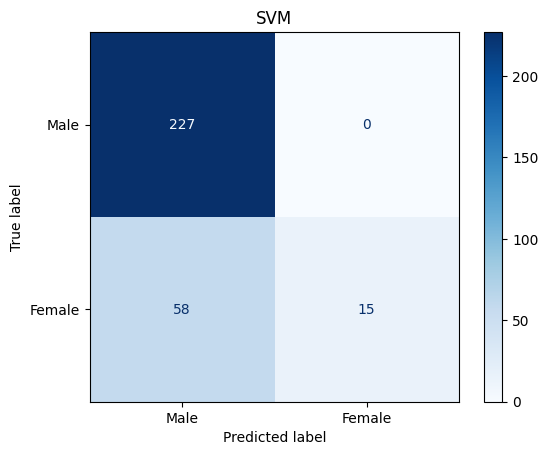

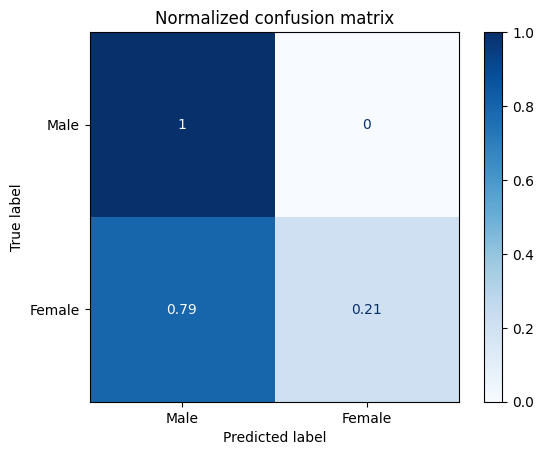

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("SVM", None),
    ("Normalized confusion matrix", "true"),
]
labels = ['Male', 'Female']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_count,
        test_data,
        test_gender_labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        display_labels=labels,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (2,4))

  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='char',
                          tokenizer = identity, ngram_range = (2,4))
  return vec

In [ ]:
#######   Word Analyzer     ######

vec = vec_tfidf(tfidf = False)
 # combines the vectorizer with the Naive Bayes classifier
classifier = Pipeline([('vec', vec),
                         ('cls',MultinomialNB())])
%time

classifier.fit(join_words(train_data), train_gender_labels)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.78 µs


Pipeline(steps=[('vec',
                 CountVectorizer(analyzer='char', ngram_range=(2, 4),
                                 preprocessor=<function identity at 0x7f2dd452f1c0>,
                                 tokenizer=<function identity at 0x7f2dd452f1c0>)),
                ('cls', MultinomialNB())])

In [ ]:
# prediction = classifier.predict(join_words(dev_data))
prediction = classifier.predict(join_words(test_data))

print("Naive Bayes Accuracy = ", accuracy_score(test_gender_labels, prediction))
print()

print(classification_report(test_gender_labels, prediction, labels=classifier.classes_, digits=3))

Naive Bayes Accuracy =  0.7966666666666666

              precision    recall  f1-score   support

           0      0.923     0.797     0.856       227
           1      0.558     0.795     0.655        73

    accuracy                          0.797       300
   macro avg      0.741     0.796     0.756       300
weighted avg      0.834     0.797     0.807       300



In [ ]:
predict_actual = classifier.predict(join_words(test_data))       # Predict using classifier.
accuracy_actual = classifier.score(join_words(test_data), test_gender_labels)
classification_report_actual = classification_report(test_gender_labels, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0
 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 1]
0.7966666666666666
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       227
           1       0.56      0.79      0.66        73

    accuracy                           0.80       300
   macro avg       0.74      0.80      0.76       300
weighted avg       0.83      0.80      0.81       300



In [ ]:
decision_function = classifier.predict_proba(join_words(test_data))

In [ ]:
decision_function

In [ ]:
decision_function=decision_function.reshape(-1,1)

In [ ]:
#######   Word Analyzer     ######

vec = vec_tfidf(tfidf = False)
 # combines the vectorizer with the Naive Bayes classifier
classifier = Pipeline([('vec', vec),
                         ('cls',SVC())])
%time

classifier.fit(join_words(train_data), train_gender_labels)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.2 µs


Pipeline(steps=[('vec',
                 CountVectorizer(analyzer='char', ngram_range=(2, 4),
                                 preprocessor=<function identity at 0x7a09d5e79750>,
                                 tokenizer=<function identity at 0x7a09d5e79750>)),
                ('cls', SVC())])

In [ ]:
# prediction = classifier.predict(join_words(dev_data))
prediction = classifier.predict(join_words(test_data))

print("Naive Bayes Accuracy = ", accuracy_score(test_gender_labels, prediction))
print()

print(classification_report(test_gender_labels, prediction, labels=classifier.classes_, digits=3))

Naive Bayes Accuracy =  0.7366666666666667

              precision    recall  f1-score   support

           0      0.752     0.974     0.848       227
           1      0.000     0.000     0.000        73

    accuracy                          0.737       300
   macro avg      0.376     0.487     0.424       300
weighted avg      0.569     0.737     0.642       300



In [ ]:
decision_function = classifier.decision_function(join_words(test_data))

In [ ]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Precision-Recall Curve')

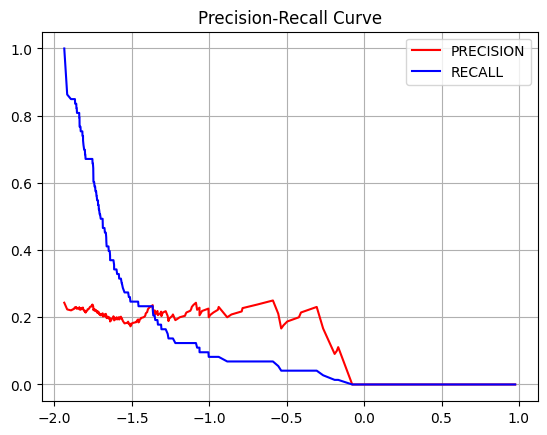

In [ ]:
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(test_gender_labels, decision_function)

# Plot the output.
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

In [ ]:
# Decision Function output for x_test.
df = classifier.decision_function(join_words(test_data))

# Set the value of decision threshold.
decision_teshold = 0.5914643767268305

# Desired prediction to increase precision value.
desired_predict =[]

# Iterate through each value of decision function output
# and if  decision score is > than Decision threshold then,
# append (1) to the empty list ( desired_prediction) else
# append (0).
for i in df:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)

In [ ]:
# Old Precision Value
print("old precision value:", precision_score(test_gender_labels, predict_actual))
# New precision Value
print("new precision value:", precision_score(test_gender_labels, desired_predict))

old precision value: 0.5576923076923077
new precision value: 0.0


NB
[[181  46]
 [ 15  58]]
Normalized confusion matrix
[[0.79735683 0.20264317]
 [0.20547945 0.79452055]]


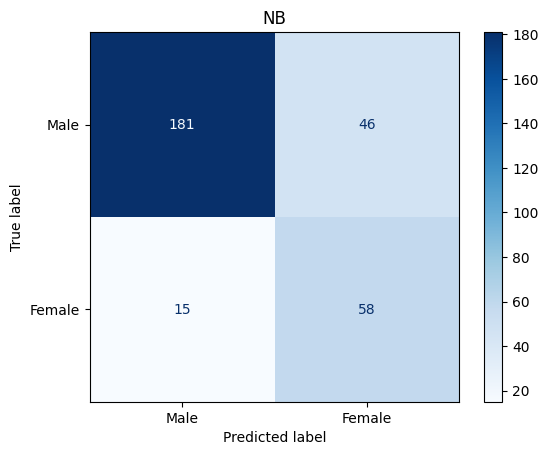

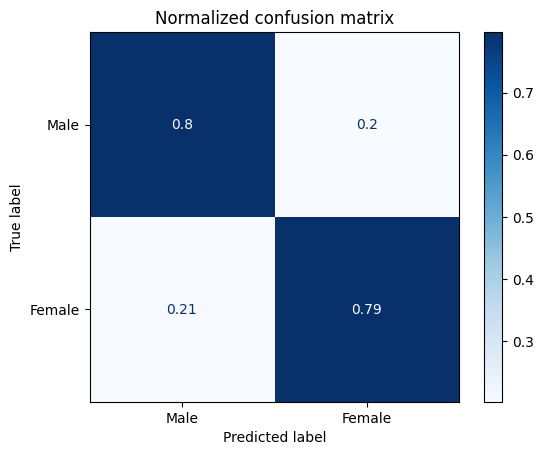

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("NB", None),
    ("Normalized confusion matrix", "true"),
]
labels = ['Male', 'Female']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        join_words(test_data),
        test_gender_labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        display_labels=labels,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##Max-langth & Vocabulary size initializing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
array_gender_label = np.array(train_gender_labels)
array_gender_label_reshaped = array_gender_label.reshape(-1,1)
np.shape(array_gender_label_reshaped)

(454, 1)

In [ ]:
# MAX_LENGTH = len(max(dense_train_doc, key=len))
MAX_LENGTH = max([len(i) for i in train_data])
# MAX_LENGTH
padded_train_doc = pad_sequences(train_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_train_doc)
padded_test_doc = pad_sequences(test_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_test_doc)
padded_dev_doc = pad_sequences(dev_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_dev_doc)

In [ ]:
# Model Declaration
# VOCUB_SIZE = max([max(i) for i in train_data if len(i)!=0])+1
VOCUB_SIZE = max([max(i) for i in train_data]) + 1
# VOCUB_SIZE
MAX_LENGTH

7340

##Decision Tree

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
padded_train_doc = sc.fit_transform(padded_train_doc)
padded_dev_doc = sc.transform(padded_dev_doc)

###Fitting Decision Tree to the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4)
classifier.fit(padded_train_doc,  array_gender_label_reshaped)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [ ]:
array_gender_label_1 = np.array(test_gender_labels)
array_gender_label_1_reshaped = array_gender_label_1.reshape(-1,1)
np.shape(array_gender_label_1_reshaped)

(300, 1)

###Prediction on dev doc

In [ ]:
y_pred = classifier.predict(padded_test_doc)
print(y_pred)


[0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(array_gender_label_1_reshaped, y_pred)
print(cm)
accuracy = accuracy_score(array_gender_label_1_reshaped, y_pred)
print("\nAccuracy: {:.2f}%".format(100 * accuracy))

[[220   7]
 [ 71   2]]

Accuracy: 74.00%


In [ ]:
from sklearn.metrics import classification_report
# make predictions on dev test
dt_prediction = classifier.predict(padded_test_doc)
print(classification_report(test_gender_labels, dt_prediction, labels=classifier.classes_, digits=3))


              precision    recall  f1-score   support

           0      0.756     0.969     0.849       227
           1      0.222     0.027     0.049        73

    accuracy                          0.740       300
   macro avg      0.489     0.498     0.449       300
weighted avg      0.626     0.740     0.655       300



###Confusion Matrix

In [ ]:
# class_type = {0: 'Male', 1: 'Female'}

# for indx, doc in enumerate(test_data_trial[:100]):
#   print("Actual label - {}: Prediction = {} ({}) -- {}".format(array_gender_label_1_reshaped[indx], y_pred[indx], class_type[y_pred[indx]], doc))

Actual label - [0]: Prediction = 0 (Male) -- ['প্রত্যেকের সাফল্যই গৃহীত।প্রত্যেকেই দীর্ঘ কষ্টের ফলে অর্জন করেন। এমন নয়, পছন্দের জব পেলেই শেষ। বরং জবে নিজের কাজের প্রমাণ, পেশাজীবী হিসেবে প্রতিষ্ঠা এসব জরুরি। সরকারি- বেসরকারি জবের দ্বন্দ্ব বিসিএস নয়, এটা সুযোগ সুবিধার। দুটোর মধ্যে ফারাক বাড়ছে। আর্থসামাজিক প্রেক্ষাপটে তা-র প্রভাব নিয়ে আলোচনা হতে পারে। তবে যারা সরকারি চাকরি করছে অবশ্যই তাদের নিয়ে খারাপ মন্তব্য গ্রাহ্য নয়। কেননা আধুনিক,দক্ষ ও সৎ ক্যাডার তৈরি করতে না পারলে বাংলাদেশের নীতি নির্ধারণে কাজে পরিবর্তন আসবে না। ক্ষমতার বিকেন্দ্রীকরণে নতুন ক্যাডারদের চিন্তা কতটুকু?\n', 'কখনো কখনো সাংবাদিকতার লেখনী কাব্যিক চরিত্র গ্রহণ করে। মনে হয় তাদের লেখনী আমাদের কথা বলছে। আমরা গল্প-কবিতা পড়ছি। মুক্তিযুদ্ধের সময় এম. আর আখতার মুকুলের চরমপত্র কে ভুলতে পারবে। তেমনি মোজাম্মেল হকের গেদু চাচার কলাম। স্বৈরাচার বিরোধী আন্দোলনে গেদু চাচার খোলা চিঠি হাসিনা খালেদা এমনকি এরশাদকে। তবে তাঁর সম্পাদিত আজকের সূর্যোদয়ে প্রকাশিত শ্রেষ্ঠ ১০০ বাঙালি দিয়ে আমার অনেক মনিষীর সাথে পরিচয় হয়েছিল।\n', 'আমাদের দেশে বর্তমানে এক

##K-Nearest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(padded_train_doc, train_gender_labels)

# p = 1, when p is set to 1 we get Manhattan distance
# p = 2, when p is set to 2 we get Euclidean distance

KNeighborsClassifier()

In [ ]:
array_gender_label_1 = np.array(test_gender_labels)
array_gender_label_1_reshaped = array_gender_label_1.reshape(-1,1)
np.shape(array_gender_label_1_reshaped)

(300, 1)

In [ ]:
y_pred = knn_classifier.predict(padded_test_doc)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(array_gender_label_1_reshaped, y_pred)
print(cm)
accuracy = accuracy_score(array_gender_label_1_reshaped, y_pred)
print("\nAccuracy: {:.2f}%".format(100 * accuracy))

[[205  22]
 [ 68   5]]

Accuracy: 70.00%


In [ ]:
knn_prediction = knn_classifier.predict(padded_test_doc)

# make predictions on dev test
knn_prediction = knn_classifier.predict(padded_test_doc)

print(classification_report(test_gender_labels, knn_prediction, labels=knn_classifier.classes_, digits=3))



              precision    recall  f1-score   support

           0      0.751     0.903     0.820       227
           1      0.185     0.068     0.100        73

    accuracy                          0.700       300
   macro avg      0.468     0.486     0.460       300
weighted avg      0.613     0.700     0.645       300



###Ploting confusion matrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.metrics import plot_confusion_matrix

Confusion Matrix: 
 [[205  22]
 [ 68   5]]


Text(45.722222222222214, 0.5, 'ACTUAL VALUES')

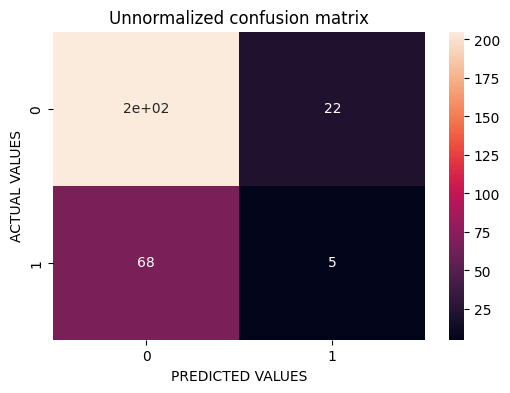

In [ ]:
#Generate the confusion matrix
confusion_matrix= confusion_matrix(test_gender_labels, knn_prediction)
print('Confusion Matrix: \n',confusion_matrix)
#Un-normalized confusion matrix
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix,annot=True)
ax.set_title('Unnormalized confusion matrix')
ax.set_xlabel('PREDICTED VALUES')
ax.set_ylabel('ACTUAL VALUES')

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(solver='liblinear', max_iter=1)
lr_classifier.fit(padded_train_doc, train_gender_labels)

# In the LR model, the ‘lbfgs’ optimizer is used with ‘l2’ regularizer. The inverse regularization strength is fixed to 1.0, and a maximum of 400 iterations are taken for solvers to converge.

LogisticRegression(max_iter=1, solver='liblinear')

In [ ]:
array_gender_label_1 = np.array(test_gender_labels)
array_gender_label_1_reshaped = array_gender_label_1.reshape(-1,1)
np.shape(array_gender_label_1_reshaped)

(300, 1)

In [ ]:
lr_prediction = lr_classifier.predict(padded_test_doc)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(100 * lr_classifier.score(padded_test_doc, array_gender_label_1_reshaped)))

Accuracy of logistic regression classifier on test set: 75.33


###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(array_gender_label_1_reshaped, lr_prediction)
print(lr_cm)

[[224   3]
 [ 71   2]]


In [ ]:
lr_prediction = lr_classifier.predict(padded_test_doc)
print(classification_report(test_gender_labels, lr_prediction, labels=lr_classifier.classes_, digits=3))


              precision    recall  f1-score   support

           0      0.759     0.987     0.858       227
           1      0.400     0.027     0.051        73

    accuracy                          0.753       300
   macro avg      0.580     0.507     0.455       300
weighted avg      0.672     0.753     0.662       300



## Precision V/S Recall Curve

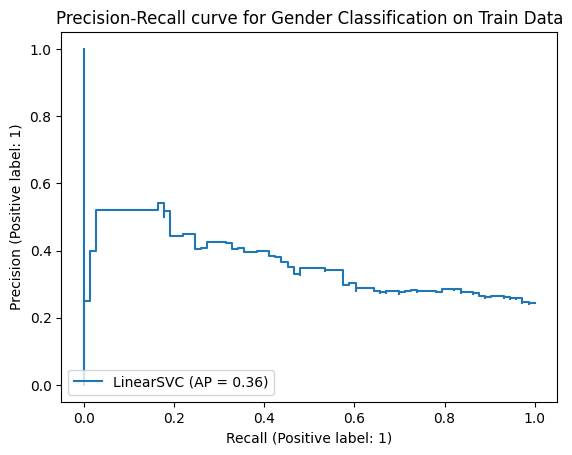

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay
y_score = lr_classifier.decision_function(padded_test_doc)

display = PrecisionRecallDisplay.from_predictions(test_gender_labels, y_score, name="LinearSVC")
_ = display.ax_.set_title("Precision-Recall curve for Gender Classification on Test Data")

##LSTM Model


In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'binary_focal_crossentropy'

In [ ]:
keras.backend.clear_session()
lstm_model = Sequential()
# Embedding Layer
# Embedding Layer where input dimension is assigned as vocubulary size, and length is equal of maximum length in dense_train_docembedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=20, input_length=MAX_LENGTH)
embedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=200, input_length=MAX_LENGTH)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(Dense(units=1, activation=activations))

lstm_model.add(Dense(units=1, activation= activations))

lstm_model.compile(optimizer='adam', loss = losses, metrics=['acc'])

print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 lstm (LSTM)                 (None, 7340, 32)          29824     
                                                                 
 dense (Dense)               (None, 7340, 1)           33        
                                                                 
 dense_1 (Dense)             (None, 7340, 1)           2         
                                                                 
Total params: 1,481,459
Trainable params: 1,481,459
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_gender/lstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                     monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)

history = lstm_model.fit(padded_train_doc,
                              array_gender_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks=mc)

Epoch 1/5
26/26 [==============================] - ETA: 0s - loss: 0.1778 - acc: 0.5564 
Epoch 1: acc improved from -inf to 0.55637, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_gender/lstm_best_model_5_16_sigmoid_binary_focal_crossentropy.h5
26/26 [==============================] - 394s 15s/step - loss: 0.1778 - acc: 0.5564 - val_loss: 0.2001 - val_acc: 0.0000e+00
Epoch 2/5
26/26 [==============================] - ETA: 0s - loss: 0.1715 - acc: 0.5564 
Epoch 2: acc did not improve from 0.55637
26/26 [==============================] - 334s 13s/step - loss: 0.1715 - acc: 0.5564 - val_loss: 0.1896 - val_acc: 0.0000e+00
Epoch 3/5
26/26 [==============================] - ETA: 0s - loss: 0.1712 - acc: 0.5564 
Epoch 3: acc did not improve from 0.55637
26/26 [==============================] - 315s 12s/step - loss: 0.1712 - acc: 0.5564 - val_loss: 0.1943 - val_acc: 0.0000e+00
Epoch 4/5
26/26 [==============================] - ETA: 0s - loss: 0.1711 

In [ ]:
# loading best saved model
lstm_saved_model =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_gender/lstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
array_gender_labels = np.array(test_gender_labels)

val_gender_label_reshaped = array_gender_labels.reshape(-1,1)
# evaluate the model
loss, accuracy = lstm_model.evaluate(padded_test_doc, val_gender_label_reshaped, verbose=2)

# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))


10/10 - 12s - loss: 0.1653 - acc: 0.7567 - 12s/epoch - 1s/step

Accuracy: 75.67%


In [ ]:
# prediction = lstm_saved_model.predict(padded_dev_doc)

In [ ]:
# dot_img_file = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_best_model.png'
# tf.keras.utils.plot_model(lstm_saved_model, to_file=dot_img_file, show_shapes=True)

##BILSTM

In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'binary_crossentropy'

In [ ]:
model = Sequential()
# # Embedding Layer
# Embedding Layer where input dimension is assigned as vocubulary size, and length is equal of maximum length in dense_train_docembedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=20, input_length=MAX_LENGTH)
embedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=200, input_length=MAX_LENGTH)
model.add(embedding_layer)

# Bidirectional LSTM [Extra]
forward_layers = LSTM(128, return_sequences=False)
backward_layers = LSTM(128, return_sequences=False, go_backwards=True)
model.add(Bidirectional(layer=forward_layers, backward_layer=backward_layers))

#model.add(Dense(units=6, activation='relu'))
#model.add(Dense(units=2, activation='softmax'))

model.add(Dense(units=1, activation= activations))

model.compile(optimizer='adam', loss= losses, metrics=['acc'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,788,753
Trainable params: 1,788,753
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_gender/bilstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                     monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
history = model.fit(padded_train_doc, array_gender_label_reshaped,
            epochs= epoch,
            batch_size = batch_sizes,
            validation_split =0.1,
            verbose = 1,
            callbacks=mc)

#Graph execution error solved by decreasing batch size from 16 to 8

Epoch 1/5
26/26 [==============================] - ETA: 0s - loss: 0.6617 - acc: 0.5833 
Epoch 1: acc improved from -inf to 0.58333, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_gender/bilstm_best_model_5_16_sigmoid_binary_crossentropy.h5
26/26 [==============================] - 964s 37s/step - loss: 0.6617 - acc: 0.5833 - val_loss: 0.4536 - val_acc: 0.9783
Epoch 2/5
26/26 [==============================] - ETA: 0s - loss: 0.6176 - acc: 0.6520 
Epoch 2: acc improved from 0.58333 to 0.65196, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_gender/bilstm_best_model_5_16_sigmoid_binary_crossentropy.h5
26/26 [==============================] - 938s 36s/step - loss: 0.6176 - acc: 0.6520 - val_loss: 0.5481 - val_acc: 0.9565
Epoch 3/5
26/26 [==============================] - ETA: 0s - loss: 0.6201 - acc: 0.6373 
Epoch 3: acc did not improve from 0.65196
26/26 [==============================] - 927s 36s/

In [ ]:
# loading best saved model
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
saved_model =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_gender/bilstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
prediction = saved_model.predict(padded_test_doc)

10/10 [==============================] - 97s 9s/step


In [ ]:
array_gender_labels = np.array(test_gender_labels)

val_gender_label_reshaped = array_gender_labels.reshape(-1,1)
# evaluate the model
loss, accuracy = model.evaluate(prediction, val_gender_label_reshaped, verbose=2)
# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

10/10 - 2s - loss: 0.6413 - acc: 0.7567 - 2s/epoch - 161ms/step

Accuracy: 75.67%


##BiLSTM + CNN

In [ ]:
# Keras Functional API
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras import datasets, layers, models

In [ ]:
epoch = 5
batch_sizes =16
activations = 'sigmoid'
losses = 'mean_absolute_error'

In [ ]:
keras.backend.clear_session()
# define bilstm + Cnn model

def lstm_cnn():
  lc_text_inputs = Input(shape=(MAX_LENGTH,))
  lc_embedding_layer = Embedding(input_dim=VOCUB_SIZE,output_dim=200)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='sigmoid')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(1, activation=activations)(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)


  return cnn_lstm_model

# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7340)]            0         
                                                                 
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 bidirectional (Bidirectiona  (None, 7340, 64)         59648     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 7339, 32)          4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3669, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 117408)            0     

In [ ]:
lstm_cnn_model.compile(optimizer = 'adam',
                      loss = losses,
                      metrics =['acc'])

In [ ]:
mc3 = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_gender/lstm_cnn_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                      monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
%time
history = lstm_cnn_model.fit(padded_train_doc,
                              array_gender_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = mc3
                              )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 21 µs
Epoch 1/5
26/26 [==============================] - ETA: 0s - loss: 0.4466 - acc: 0.5515 
Epoch 1: acc improved from -inf to 0.55147, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_gender/lstm_cnn_model_5_16_sigmoid_mean_absolute_error.h5
26/26 [==============================] - 618s 23s/step - loss: 0.4466 - acc: 0.5515 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 2/5
26/26 [==============================] - ETA: 0s - loss: 0.4436 - acc: 0.5564 
Epoch 2: acc improved from 0.55147 to 0.55637, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_gender/lstm_cnn_model_5_16_sigmoid_mean_absolute_error.h5
26/26 [==============================] - 604s 23s/step - loss: 0.4436 - acc: 0.5564 - val_loss: 1.0000 - val_acc: 0.0000e+00
Epoch 3/5
26/26 [==============================] - ETA: 0s - loss: 0.4436 - acc: 0.5564 
Epoch 3: acc did not imp

In [ ]:
saved_model3 =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_gender/lstm_cnn_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
# evaluate the model
array_gender_labels = np.array(test_gender_labels)

val_gender_label_reshaped = array_gender_labels.reshape(-1,1)
loss, accuracy = saved_model3.evaluate(padded_dev_doc, val_gender_label_reshaped, verbose=2)
# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

10/10 - 29s - loss: 0.2433 - acc: 0.7567 - 29s/epoch - 3s/step

Accuracy: 75.67%


In [ ]:
# lstm_cnn_prediction = saved_model3.predict(padded_dev_doc)
# y_pred2 = (lstm_cnn_prediction>0.5).astype('int')
# y_pred2
# print(new_gender_label ,"->>" , y_pred2)


In [ ]:
# dot_img_file3 = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_model.png'
# tf.keras.utils.plot_model(saved_model3, to_file=dot_img_file1, show_shapes=True)

##CNN with Keras Embedding

In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'mean_absolute_percentage_error'

In [ ]:
# Keras Functional API
from keras.layers import Input, Dense, Activation, Dropout,Flatten,Embedding
from keras.layers import Conv1D,MaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam,SGD,Nadam,RMSprop
from tensorflow.keras import datasets, layers, models


In [ ]:
import keras
keras.backend.clear_session()
def CNN():
  input = Input(shape=(MAX_LENGTH,))
  embedding = Embedding(input_dim=VOCUB_SIZE,output_dim=200)(input)
  conv1 = Conv1D(8,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(1, activation=activations)(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model = CNN()

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7340)]            0         
                                                                 
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 conv1d (Conv1D)             (None, 7339, 8)           3208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3669, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 29352)             0         
                                                                 
 dense (Dense)               (None, 1)                 29353     
                                                             

In [ ]:
cnn_model.compile(optimizer = 'adam',
                      loss = losses,
                      metrics =['acc'])

In [ ]:
%time
mc2 = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_gender/cnn_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                      monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
history = cnn_model.fit(padded_train_doc,
                              array_gender_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = mc2
                        )

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Epoch 1/5
26/26 [==============================] - ETA: 0s - loss: 21142658.0000 - acc: 0.5564
Epoch 1: acc improved from -inf to 0.55637, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_gender/cnn_best_model_5_16_sigmoid_mean_absolute_percentage_error.h5
26/26 [==============================] - 16s 599ms/step - loss: 21142658.0000 - acc: 0.5564 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 2/5
26/26 [==============================] - ETA: 0s - loss: 44.6136 - acc: 0.5564
Epoch 2: acc did not improve from 0.55637
26/26 [==============================] - 15s 574ms/step - loss: 44.6136 - acc: 0.5564 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 3/5
26/26 [==============================] - ETA: 0s - loss: 44.4841 - acc: 0.5564
Epoch 3: acc did not improve from 0.55637
26/26 [==============================] - 12s 461ms/step - loss: 44.4841 - acc: 0.5564 - val_loss: 100.0000 - val

In [ ]:
saved_model2 =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_gender/cnn_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
array_gender_labels = np.array(test_gender_labels)

val_gender_label_reshaped = array_gender_labels.reshape(-1,1)
# evaluate the model
loss, accuracy = saved_model2.evaluate(padded_dev_doc,val_gender_label_reshaped ,verbose=2)

# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

10/10 - 2s - loss: 24.3334 - acc: 0.7567 - 2s/epoch - 197ms/step

Accuracy: 75.67%


In [ ]:
# dot_img_file2 = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_best_model.png'
# tf.keras.utils.plot_model(saved_model2, to_file=dot_img_file1, show_shapes=True)

#K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a dataFrame to compare performance of Classifier Models
classifiers_compare = pd.DataFrame()

##For SVM

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                           tokenizer = identity, ngram_range = (2,3))

  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='word',
                           tokenizer = identity, ngram_range = (1,7))
  return vec

In [ ]:
# calls the vectorization function
vec = vec_tfidf(tfidf = True)
# combines the vectorizer with the SVM classifier
classifier_count = Pipeline([('vec', vec),
                       ('cls', SVC(kernel='poly'))])
# fit classifier to training set
svm = classifier_count.fit(train_data, train_gender_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# svmcs = cross_val_score(svm, train_data, new_gender_label, scoring = 'r2', cv=10)
train_scores = cross_val_score(svm, train_data, train_gender_labels, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("SVM")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
svmPredictDev = cross_val_predict(classifier_count, dev_data,  dev_gender_labels)
print(svmPredictDev)
dev_scores = cross_val_score(svm, dev_data,  dev_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
svmPredictTest = cross_val_predict(classifier_count, test_data, test_gender_labels)
print(svmPredictTest)
test_scores = cross_val_score(svm, test_data, test_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["SVM", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["SVM",(dev_scores.mean())]])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction

Percent accuracy within each fold:

[0.69565217 0.63043478 0.65217391 0.89130435 0.97777778 1.
 1.         0.95555556 0.93333333 0.91111111]

Mean accuracy:
0.8647342995169083


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction

Percent accuracy within each fold:

[0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
 0.76666667 0.73333333 0.73333333 0.73333333]

Mean accuracy:
0.7566666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction

Percent accuracy within each fold:

[0.76666667 0.76666667 0.76666667 0.76666667 0.76666667 0.76666667
 0.76666667 0.73333333 0.73333333 0.73333333]

Mean accuracy:
0.7566666666666666


<ipython-input-119-9c5835d24793>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_compare = classifiers_compare.append([["SVM", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
<ipython-input-119-9c5835d24793>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_compare_his = classifiers_compare.append([["SVM",(dev_scores.mean())]])


##For NB

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='char',
                          tokenizer = identity)
  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='char',
                          tokenizer = identity, ngram_range = (2,4))
  return vec

In [ ]:
#######   CHAR Analyzer     #######
vec = vec_tfidf(tfidf = False)
 # combines the vectorizer with the Naive Bayes classifier
classifier = Pipeline([('vec', vec),
                         ('cls',MultinomialNB())])
# fit classifier to training set

nb = classifier.fit(join_words(train_data), train_gender_labels)

In [ ]:
# svmcs = cross_val_score(svm, train_data, new_gender_label, scoring = 'r2', cv=10)
train_scores = cross_val_score(nb, join_words(train_data), train_gender_labels, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("NB")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
svmPredictDev = cross_val_predict(classifier,join_words(dev_data) , dev_gender_labels)
print(svmPredictDev)
dev_scores = cross_val_score(nb, join_words(dev_data), dev_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
svmPredictTest = cross_val_predict(classifier, join_words(test_data), test_gender_labels)
print(svmPredictTest)
test_scores = cross_val_score(nb, join_words(test_data), test_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["NB", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["NB",(test_scores.mean())]])

##For DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4,criterion = 'entropy', splitter="random")
dt = dtc.fit(padded_train_doc, array_gender_label_reshaped)
train_scores = cross_val_score(dt, padded_train_doc, array_gender_label_reshaped, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())

# algo_name_k_fold.append("Decision Tree")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
dtPredictDev = cross_val_predict(dtc, padded_dev_doc, dev_gender_labels)
print(dtPredictDev)
dev_scores = cross_val_score(dt, padded_dev_doc, dev_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
dtPredictTest = cross_val_predict(dtc, padded_test_doc, test_gender_labels)
print(dtPredictTest)
test_scores = cross_val_score(dt, padded_test_doc, test_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["DecisionTree", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["DecisionTree",(test_scores.mean())]])

Percent accuracy within each fold:

[0.47826087 0.52173913 0.54347826 0.65217391 0.68888889 0.57777778
 0.71111111 0.66666667 0.75555556 0.66666667]

Mean accuracy:
0.626231884057971
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Percent accuracy within each fold:

[0.73333333 0.73333333 0.76666667 0.73333333 0.73333333 0.66666667
 0.76666667 0.73333333 0.63333333 0.7       ]

Mean accuracy:
0.72
[0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 

##For KNN

In [ ]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, padded_train_doc, array_gender_label_reshaped, cv = 5,
                             scoring="accuracy")
    k_scores.append(scores.mean())
print('k_scores mean:{}'.format(np.mean(k_scores)))

k_scores mean:0.6463584691170896


Text(0, 0.5, 'Cross-Validated Accuracy')

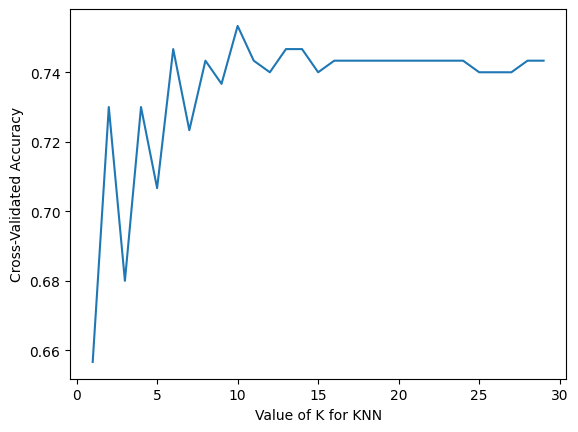

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [ ]:
array_gender_label = np.array(test_gender_labels)
array_gender_label_reshaped = array_gender_label.reshape(-1,1)
np.shape(array_gender_label_reshaped)

(300, 1)

In [ ]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, padded_test_doc, array_gender_label_reshaped, cv = 10,
                             scoring="accuracy")
    k_scores.append(scores.mean())
print('k_scores mean:{}'.format(np.mean(k_scores)))

k_scores mean:0.7327586206896551


In [ ]:
print(k_scores)

[0.65, 0.7233333333333334, 0.6799999999999999, 0.7300000000000001, 0.7, 0.7266666666666667, 0.7099999999999999, 0.7366666666666667, 0.7300000000000001, 0.7433333333333334, 0.7433333333333334, 0.7466666666666667, 0.7533333333333334, 0.7433333333333334, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.7433333333333334, 0.7433333333333334, 0.7466666666666667, 0.7433333333333334, 0.7466666666666667, 0.7466666666666667, 0.7466666666666667, 0.7366666666666667]


Text(0, 0.5, 'Cross-Validated Accuracy')

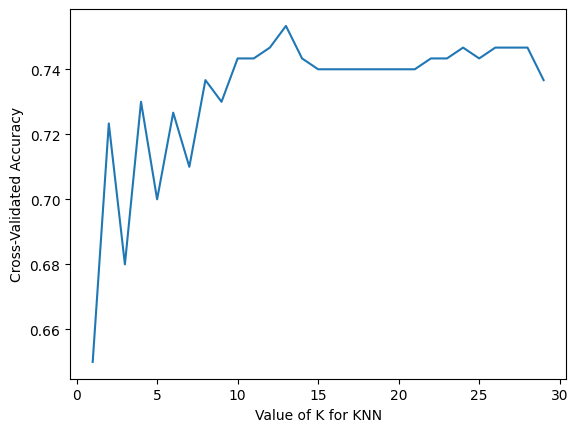

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [ ]:
array_gender_label = np.array(train_gender_labels)
array_gender_label_reshaped = array_gender_label.reshape(-1,1)
np.shape(array_gender_label_reshaped)

In [ ]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 13, metric = 'minkowski', p = 2)
knn = knnc.fit(padded_train_doc,array_gender_label_reshaped)
train_scores = cross_val_score(knn, padded_train_doc, array_gender_label_reshaped, cv = 10, scoring = "accuracy")
train_scores
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("K-Nearest Neighbour")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
knnPredictDev = cross_val_predict(knnc, padded_dev_doc, dev_gender_labels)
print(knnPredictDev)
dev_scores = cross_val_score(knn, padded_dev_doc, dev_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
knnPredictTest = cross_val_predict(knnc, padded_test_doc, test_gender_labels)
print(knnPredictTest)
test_scores = cross_val_score(knn, padded_test_doc ,test_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["K-Nearest Neighbour", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["K-Nearest Neighbour",(test_scores.mean())]])


Percent accuracy within each fold:

[0.47826087 0.5        0.5        0.82608696 0.6        0.86666667
 0.73333333 0.68888889 0.73333333 0.64444444]

Mean accuracy:
0.6571014492753624
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Percent accuracy within each fold:

[0.7        0.76666667 0.76666667 0.76666667 0.73333333 0.8
 0.76666667 0.76666667 0.8        0.76666667]

Mean accuracy:
0.7633333333333333
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 

##For LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', max_iter=1)
lr = lrc.fit(padded_train_doc,train_gender_labels)
train_scores = cross_val_score(lr, padded_train_doc, train_gender_labels, cv = 10, scoring="accuracy")
train_scores
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:\n")
print(train_scores.mean())
# algo_name_k_fold.append("Logistric Regression")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
lrPredictDev = cross_val_predict(lrc, padded_dev_doc, dev_gender_labels)
print(lrPredictDev)
dev_scores = cross_val_score(lr, padded_dev_doc, dev_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
lrPredictTest = cross_val_predict(lrc, padded_test_doc, test_gender_labels)
print(lrPredictTest)
test_scores = cross_val_score(lr, padded_test_doc, test_gender_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["Logistric Regression", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["Logistric Regression",(test_scores.mean())]])

Percent accuracy within each fold:

[0.5        0.41304348 0.58695652 0.86956522 0.62222222 0.86666667
 0.8        0.8        0.82222222 0.73333333]

Mean accuracy:

0.7014009661835748
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
Percent accuracy within each fold:

[0.76666667 0.76666667 0.73333333 0.76666667 0.76666667 0.76666667
 0.76666667 0.73333333 0.73333333 0.73333333]

Mean accuracy:
0.7533333333333333
[0 0 0 0 0 0 0 0 0 0 

In [ ]:
classifiers_compare

,0,1,2,3
0,DecisionTree,0.626232,0.720000,0.703333
0,K-Nearest Neighbour,0.508792,0.730000,0.753333
0,Logistric Regression,0.701401,0.753333,0.753333


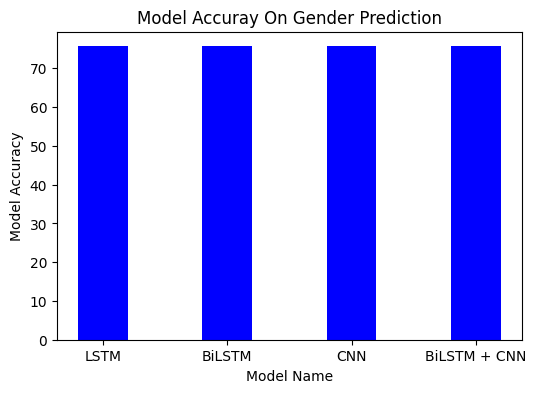

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'LSTM':75.67, 'BiLSTM':75.67,  'CNN':75.67, 'BiLSTM + CNN':75.67}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (6, 4))
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
plt.xlabel("Model Name")
plt.ylabel("Model Accuracy")
plt.title("Model Accuray On Gender Prediction")
plt.show()

# Age Classification

##Extracting truth data


In [ ]:
train_truth_data_age = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Train/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    train_truth_data_age.append(line)

dev_truth_data_age = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Dev/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    dev_truth_data_age.append(line)

test_truth_data_age = []
with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Test/#Truth.txt', 'r') as truth_file:
  for line in truth_file:
    test_truth_data_age.append(line)

In [ ]:
# Train Truth Data
train_ids = []
train_age = []
train_gender = []


for line in train_truth_data_age:
  splitted_line = line.strip().split(':::', 3)
  train_ids.append(splitted_line[0])
  train_gender.append(splitted_line[1])
  train_age.append(splitted_line[2])


train_age_dictionary = { '18-24' :0, '25-34' :1, '35-49' :2, '50-xx' :3}
train_age_labels= [train_age_dictionary[i] for i in train_age]

# Dev Truth Data
dev_ids = []
dev_age = []
dev_gender = []

for line in dev_truth_data_age:
  splitted_line = line.strip().split(':::', 3)
  dev_ids.append(splitted_line[0])
  dev_gender.append(splitted_line[1])
  dev_age.append(splitted_line[2])


dev_age_dictionary = { '18-24' :0, '25-34' :1, '35-49' :2, '50-xx' :3}
dev_age_labels= [dev_age_dictionary[i] for i in dev_age]

dev_gender_dictionary = { 'M' :0, 'F' :1}
dev_gender_labels= [dev_gender_dictionary[i] for i in dev_gender]

# Test Truth Data
test_ids = []
test_age = []
test_gender = []

for line in test_truth_data_age:
  splitted_line = line.strip().split(':::', 3)
  test_ids.append(splitted_line[0])
  test_gender.append(splitted_line[1])
  test_age.append(splitted_line[2])


test_age_dictionary = { '18-24' :0, '25-34' :1, '35-49' :2, '50-xx' :3}
test_age_labels= [test_age_dictionary[i] for i in test_age]

test_gender_dictionary = { 'M' :0, 'F' :1}
test_gender_labels= [test_gender_dictionary[i] for i in test_gender]

##Extracting Data

In [ ]:
# Train Data
data_train = []
train_data_trial = []

for i in range(0,508):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Train/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_train.append(line)

  len_of_data_train = len(data_train)
  train_data_trial.append(data_train[:len_of_data_train])
  data_train.clear()


In [ ]:
# Dev Data
data_dev = []
dev_data_trial = []

for i in range(0,300):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Dev/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_dev.append(line)

  len_of_data_dev = len(data_dev)
  dev_data_trial.append(data_dev[:len_of_data_dev])
  data_dev.clear()

In [ ]:
#Test Data
data_test = []
test_data_trial = []

for i in range(0,300):
  with open('BN-AuthProf_Dataset/Exp_Dataset/Age/Test/{0}.txt'.format(i+1),'r', encoding='utf-8') as f:
    for line in f:
      data_test.append(line)

  len_of_data_test = len(data_test)
  test_data_trial.append(data_test[:len_of_data_test])
  data_test.clear()

## Preprocessing train data, test data and dev data

In [ ]:
test_data = []
dev_data = []
train_data = []
for line in test_data_trial:
  test_data.append(combine_tokens(pre_processing(line)))

for line in dev_data_trial:
  dev_data.append(combine_tokens(pre_processing(line)))

for line in train_data_trial:
  train_data.append(combine_tokens(pre_processing(line)))



##SVM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                           tokenizer = identity, ngram_range = (2,5))
  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='char',
                           tokenizer = identity, ngram_range = (1,1))
  return vec

In [ ]:
# calls the vectorization function
vec = vec_tfidf(tfidf = True)


# combines the vectorizer with the SVM classifier
classifier_count = Pipeline([('vec', vec),
                       ('cls', SVC(kernel='poly'))])

# fit classifier to training set
classifier_count.fit(train_data,train_age_labels)

Pipeline(steps=[('vec',
                 TfidfVectorizer(ngram_range=(2, 5),
                                 preprocessor=<function identity at 0x7c1f232af880>,
                                 tokenizer=<function identity at 0x7c1f232af880>)),
                ('cls', SVC(kernel='poly'))])

In [ ]:
# make predictions on dev test
prediction = classifier_count.predict(test_data)

# compute and print accuracy score
print("SVM Accuracy = ", accuracy_score(test_age_labels, prediction))
print()

print(classification_report(test_age_labels, prediction, labels=classifier_count.classes_, digits=3))

SVM Accuracy =  0.6533333333333333

              precision    recall  f1-score   support

           0      1.000     0.349     0.517        43
           1      0.550     1.000     0.709       127
           2      1.000     0.524     0.688        82
           3      1.000     0.229     0.373        48

    accuracy                          0.653       300
   macro avg      0.887     0.526     0.572       300
weighted avg      0.809     0.653     0.622       300



SVM
[[ 15  28   0   0]
 [  0 127   0   0]
 [  0  39  43   0]
 [  0  37   0  11]]
Normalized confusion matrix
[[0.34883721 0.65116279 0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.47560976 0.52439024 0.        ]
 [0.         0.77083333 0.         0.22916667]]


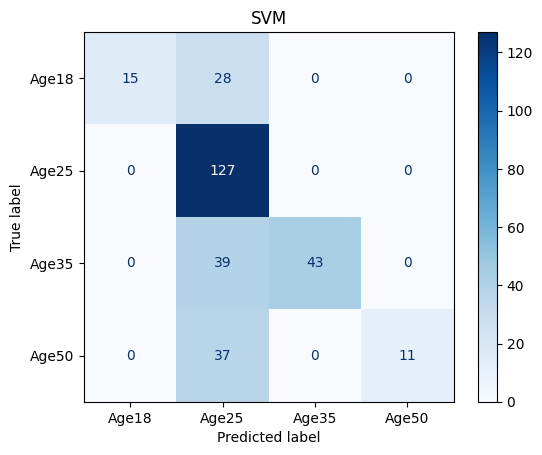

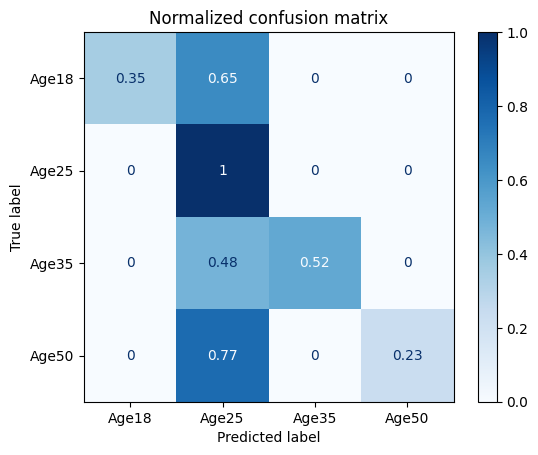

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("SVM", None),
    ("Normalized confusion matrix", "true"),
]
labels = ['Age18', 'Age25', 'Age35', 'Age50']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier_count,
        test_data,
        test_age_labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        display_labels=labels,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (2,4))

  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (2,3))
  return vec

In [ ]:
#######   Word Analyzer     ######

vec = vec_tfidf(tfidf = False)
 # combines the vectorizer with the Naive Bayes classifier
classifier = Pipeline([('vec', vec),
                         ('cls',MultinomialNB())])
%time

classifier.fit(train_data, train_age_labels)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


Pipeline(steps=[('vec',
                 CountVectorizer(ngram_range=(2, 3),
                                 preprocessor=<function identity at 0x7f2e632c1360>,
                                 tokenizer=<function identity at 0x7f2e632c1360>)),
                ('cls', MultinomialNB())])

In [ ]:
# prediction = classifier.predict(join_words(dev_data))
prediction = classifier.predict(test_data)

print("Naive Bayes Accuracy = ", accuracy_score(test_age_labels, prediction))
print()

print(classification_report(test_age_labels, prediction, labels=classifier.classes_, digits=3))

Naive Bayes Accuracy =  0.91

              precision    recall  f1-score   support

           0      0.729     1.000     0.843        43
           1      0.982     0.850     0.911       127
           2      0.939     0.939     0.939        82
           3      0.918     0.938     0.928        48

    accuracy                          0.910       300
   macro avg      0.892     0.932     0.905       300
weighted avg      0.924     0.910     0.912       300



Naive Bayes
[[ 43   0   0   0]
 [ 10 108   5   4]
 [  3   2  77   0]
 [  3   0   0  45]]
Normalized confusion matrix
[[1.         0.         0.         0.        ]
 [0.07874016 0.8503937  0.03937008 0.03149606]
 [0.03658537 0.02439024 0.93902439 0.        ]
 [0.0625     0.         0.         0.9375    ]]


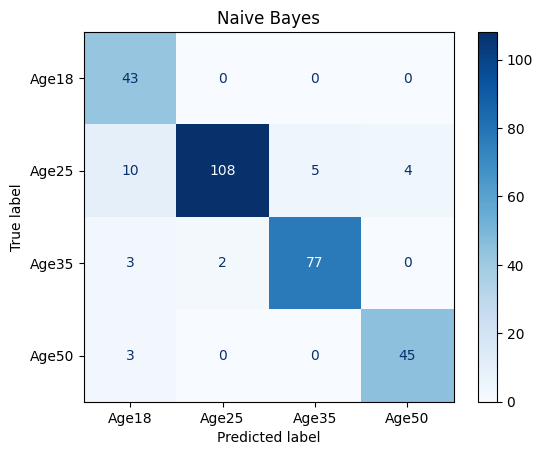

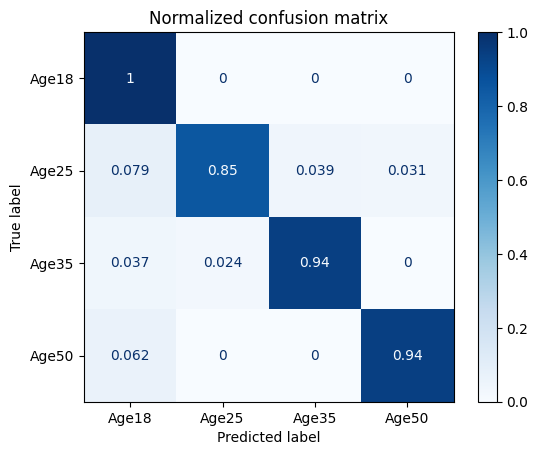

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Naive Bayes", None),
    ("Normalized confusion matrix", "true"),
]
labels = ['Age18', 'Age25', 'Age35', 'Age50']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        test_data,
        test_age_labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
        display_labels=labels,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##Max-langth & Vocabulary size initializing

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
array_age_label = np.array(train_age_labels)
array_age_label_reshaped = array_age_label.reshape(-1,1)
np.shape(array_age_label_reshaped)

(508, 1)

In [ ]:
# MAX_LENGTH = len(max(dense_train_doc, key=len))
MAX_LENGTH = max([len(i) for i in train_data])
# MAX_LENGTH
padded_train_doc = pad_sequences(train_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_train_doc)
padded_test_doc = pad_sequences(test_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_test_doc)
padded_dev_doc = pad_sequences(dev_data, maxlen=MAX_LENGTH, padding='post')
# print(padded_dev_doc)

In [ ]:
# Model Declaration
# VOCUB_SIZE = max([max(i) for i in train_data if len(i)!=0])+1
VOCUB_SIZE = max([max(i) for i in train_data]) + 1
# VOCUB_SIZE
MAX_LENGTH

123260

##Decision Tree


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [ ]:
sc = StandardScaler()
padded_train_doc = sc.fit_transform(padded_train_doc)
padded_dev_doc = sc.transform(padded_dev_doc)

In [ ]:

# regressor = DecisionTreeRegressor(random_state = 0)
dt_classifier = DecisionTreeClassifier(criterion = 'gini', splitter="random", max_depth = 6)
dt_classifier.fit(padded_train_doc, array_age_label_reshaped)

DecisionTreeClassifier(max_depth=6, splitter='random')

In [ ]:
array_age_label_1 = np.array(test_age_labels)
array_age_label_1_reshaped = array_age_label_1.reshape(-1,1)
np.shape(array_age_label_1_reshaped)

(300, 1)

In [ ]:
y_pred = dt_classifier.predict(padded_test_doc)
print(y_pred)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(array_age_label_1_reshaped, y_pred)
print(cm)
accuracy = accuracy_score(array_age_label_1_reshaped, y_pred)
print("\nAccuracy: {:.2f}%".format(100 * accuracy))

[[  0  43   0   0]
 [  0 125   2   0]
 [  1  80   1   0]
 [  0  47   1   0]]

Accuracy: 42.00%


In [ ]:
from sklearn.metrics import classification_report
# make predictions on dev test
dt_prediction = dt_classifier.predict(padded_test_doc)
print(classification_report(test_age_labels, dt_prediction, labels=dt_classifier.classes_, digits=3))

              precision    recall  f1-score   support

           0      0.000     0.000     0.000        43
           1      0.424     0.984     0.592       127
           2      0.250     0.012     0.023        82
           3      0.000     0.000     0.000        48

    accuracy                          0.420       300
   macro avg      0.168     0.249     0.154       300
weighted avg      0.248     0.420     0.257       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(array_age_label_1_reshaped, y_pred)
# print(cm)
# print('Accuracy of logistic decison tree on test set: {:.2f}'.format(100 * dt_classifier.score(padded_dev_doc, array_age_label_1_reshaped)))

[[  2  41   0   0]
 [  9 118   0   0]
 [ 16  64   1   1]
 [  9  38   0   1]]
Accuracy of logistic decison tree on test set: 40.67


##K-Nearest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn_classifier.fit(padded_train_doc, train_age_labels)


KNeighborsClassifier(n_neighbors=1)

In [ ]:
array_age_label_1 = np.array(test_age_labels)
array_age_label_1_reshaped = array_age_label_1.reshape(-1,1)
np.shape(array_age_label_1_reshaped)

(300, 1)

In [ ]:
y_pred = knn_classifier.predict(padded_test_doc)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(array_age_label_1_reshaped, y_pred)
print(cm)
accuracy = accuracy_score(array_age_label_1_reshaped, y_pred)
print("\nAccuracy: {:.2f}%".format(100 * accuracy))

[[13 14  6 10]
 [18 54 18 37]
 [13 37  8 24]
 [ 8 11 11 18]]

Accuracy: 31.00%


In [ ]:
# make predictions on dev test
knn_prediction = knn_classifier.predict(padded_test_doc)

print(classification_report(test_age_labels, knn_prediction, labels=knn_classifier.classes_, digits=3))


              precision    recall  f1-score   support

           0      0.250     0.302     0.274        43
           1      0.466     0.425     0.444       127
           2      0.186     0.098     0.128        82
           3      0.202     0.375     0.263        48

    accuracy                          0.310       300
   macro avg      0.276     0.300     0.277       300
weighted avg      0.316     0.310     0.304       300



##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(padded_train_doc, train_age_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
array_age_label_1 = np.array(test_age_labels)
array_age_label_1_reshaped = array_age_label_1.reshape(-1,1)
np.shape(array_age_label_1_reshaped)

(300, 1)

In [ ]:
lr_prediction = lr_classifier.predict(padded_test_doc)

In [ ]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(100 * lr_classifier.score(padded_test_doc, array_age_label_1_reshaped)))

Accuracy of logistic regression classifier on test set: 14.67


###Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(array_age_label_1_reshaped, lr_prediction)
print(lr_cm)

[[ 41   0   0   2]
 [117   0   0  10]
 [ 78   0   0   4]
 [ 44   0   1   3]]


In [ ]:
print(classification_report(test_age_labels, lr_prediction, labels=lr_classifier.classes_, digits=3))

              precision    recall  f1-score   support

           0      0.146     0.953     0.254        43
           1      0.000     0.000     0.000       127
           2      0.000     0.000     0.000        82
           3      0.158     0.062     0.090        48

    accuracy                          0.147       300
   macro avg      0.076     0.254     0.086       300
weighted avg      0.046     0.147     0.051       300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##LSTM Model


In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'binary_focal_crossentropy'

In [ ]:
keras.backend.clear_session()
lstm_model = Sequential()
# Embedding Layer
# Embedding Layer where input dimension is assigned as vocubulary size, and length is equal of maximum length in dense_train_docembedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=20, input_length=MAX_LENGTH)
embedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=200, input_length=MAX_LENGTH)
lstm_model.add(embedding_layer)
lstm_model.add(LSTM(32, return_sequences=True))
lstm_model.add(Dense(units=1, activation=activations))

lstm_model.add(Dense(units=1, activation= activations))

print(lstm_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 lstm (LSTM)                 (None, 7340, 32)          29824     
                                                                 
 dense (Dense)               (None, 7340, 1)           33        
                                                                 
 dense_1 (Dense)             (None, 7340, 1)           2         
                                                                 
Total params: 1,481,459
Trainable params: 1,481,459
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
lstm_model.compile(optimizer = 'adam',
                      loss = losses,
                      metrics =['acc'])

In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_age/lstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                     monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
%time
history = lstm_model.fit(padded_train_doc,
                              array_age_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks=mc)

CPU times: user 0 ns, sys: 4 µs, total: 4 µs
Wall time: 7.15 µs
Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: -0.0177 - acc: 0.2779
Epoch 1: acc improved from -inf to 0.27790, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_age/lstm_best_model_5_16_sigmoid_binary_focal_crossentropy.h5
29/29 [==============================] - 24s 472ms/step - loss: -0.0177 - acc: 0.2779 - val_loss: -3.7454 - val_acc: 0.0000e+00
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: -0.4660 - acc: 0.2779
Epoch 2: acc did not improve from 0.27790
29/29 [==============================] - 9s 310ms/step - loss: -0.4660 - acc: 0.2779 - val_loss: -4.6814 - val_acc: 0.0000e+00
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: -0.5702 - acc: 0.2779
Epoch 3: acc did not improve from 0.27790
29/29 [==============================] - 8s 274ms/step - loss: -0.5702 - acc: 0.2779 - val_loss: -5.1988 - val_acc: 0.0000e+00
Epoch 

In [ ]:
# loading best saved model
lstm_saved_model =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_age/lstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
prediction = lstm_saved_model.predict(padded_test_doc)

10/10 [==============================] - 1s 78ms/step


In [ ]:
array_age_labels = np.array(test_age_labels)

val_age_label_reshaped = array_age_labels.reshape(-1,1)
# evaluate the model
loss, accuracy = lstm_model.evaluate(prediction, val_age_label_reshaped, verbose=2)
# print accuracy
print("\nAccuracy: {:.2f}%".format(100 * accuracy))

10/10 - 2s - loss: -9.5439e-01 - acc: 0.4233 - 2s/epoch - 176ms/step

Accuracy: 42.33%


In [ ]:
# dot_img_file = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_best_model.png'
# tf.keras.utils.plot_model(lstm_saved_model, to_file=dot_img_file, show_shapes=True)

##BILSTM

In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'binary_crossentropy'

In [ ]:
model = Sequential()
# Embedding Layer
# Embedding Layer where input dimension is assigned as vocubulary size, and length is equal of maximum length in dense_train_docembedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=20, input_length=MAX_LENGTH)
embedding_layer = Embedding(input_dim=VOCUB_SIZE, output_dim=200, input_length=MAX_LENGTH)
model.add(embedding_layer)

# Bidirectional LSTM [Extra]
forward_layers = LSTM(128, return_sequences=False)
backward_layers = LSTM(128, return_sequences=False, go_backwards=True)
model.add(Bidirectional(layer=forward_layers, backward_layer=backward_layers))

#model.add(Dense(units=6, activation='relu'))
#model.add(Dense(units=2, activation='softmax'))

model.add(Dense(units=1, activation= activations))

model.compile(optimizer='adam', loss = losses, metrics=['acc'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 7340, 200)         1451600   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,788,753
Trainable params: 1,788,753
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
mc = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_age/bilstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                     monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
history = model.fit(padded_train_doc, array_age_label_reshaped,
            epochs= epoch,
            batch_size = batch_sizes,
            validation_split =0.1,
            verbose = 1,
            callbacks=mc)

Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: -3.2470 - acc: 0.2713
Epoch 1: acc improved from -inf to 0.27133, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_age/bilstm_best_model_5_16_sigmoid_binary_crossentropy.h5
29/29 [==============================] - 28s 835ms/step - loss: -3.2470 - acc: 0.2713 - val_loss: -39.4093 - val_acc: 0.0000e+00
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: -8.2209 - acc: 0.2779
Epoch 2: acc improved from 0.27133 to 0.27790, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_age/bilstm_best_model_5_16_sigmoid_binary_crossentropy.h5
29/29 [==============================] - 17s 566ms/step - loss: -8.2209 - acc: 0.2779 - val_loss: -57.5271 - val_acc: 0.0000e+00
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: -10.6357 - acc: 0.2779
Epoch 3: acc did not improve from 0.27790
29/29 [==============================] 

In [ ]:
# loading best saved model
saved_model =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/bilstm_age/bilstm_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
bilstm_prediction = saved_model.predict(padded_dev_doc)
# bilstm_prediction = np.argmax(saved_model.predict(padded_dev_doc), axis=-1)

10/10 [==============================] - 2s 167ms/step


In [ ]:
array_age_labels = np.array(test_age_labels)

val_age_label_reshaped = array_age_labels.reshape(-1,1)
# # evaluate the model
loss, accuracy = model.evaluate(bilstm_prediction, val_age_label_reshaped, verbose=2)
# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

# compute the classification report
# print(classification_report(val_age_label_reshaped, bilstm_prediction))

10/10 - 1s - loss: 0.0930 - acc: 0.4233 - 769ms/epoch - 77ms/step

Accuracy: 42.33%


##CNN with Keras Embedding

In [ ]:
from keras.layers.convolutional import Conv1D
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D

In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'mean_absolute_percentage_error'

In [ ]:
import keras
keras.backend.clear_session()
def CNN():
  input = Input(shape=(MAX_LENGTH,))
  embedding = Embedding(input_dim=VOCUB_SIZE,output_dim=200)(input)
  conv1 = Conv1D(8,2,activation='relu')(embedding)
  pool1 = MaxPooling1D(2)(conv1)
  flat = Flatten()(pool1)
  output_layer = Dense(1, activation=activations)(flat)
  model = Model(inputs=input, outputs=output_layer)

  return model

# call the model
cnn_model = CNN()

cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7340)]            0         
                                                                 
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 conv1d (Conv1D)             (None, 7339, 8)           3208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3669, 8)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 29352)             0         
                                                                 
 dense (Dense)               (None, 1)                 29353     
                                                             

In [ ]:
cnn_model.compile(optimizer = 'adam',
                      loss = losses,
                      metrics =['acc'])

In [ ]:
%time
mc2 = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_age/cnn_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                      monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
history = cnn_model.fit(padded_train_doc,
                              array_age_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = mc2
                        )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: 12535277.0000 - acc: 0.2735
Epoch 1: acc improved from -inf to 0.27352, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_age/cnn_best_model_5_16_sigmoid_mean_absolute_percentage_error.h5
29/29 [==============================] - 17s 347ms/step - loss: 12535277.0000 - acc: 0.2735 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 2/5
28/29 [===========================>..] - ETA: 0s - loss: 71.6493 - acc: 0.2835
Epoch 2: acc improved from 0.27352 to 0.28009, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_age/cnn_best_model_5_16_sigmoid_mean_absolute_percentage_error.h5
29/29 [==============================] - 3s 104ms/step - loss: 71.9880 - acc: 0.2801 - val_loss: 100.0000 - val_acc: 0.0000e+00
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: 71.8881 - acc: 0.280

In [ ]:
saved_model2 =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_age/cnn_best_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
array_age_labels = np.array(test_age_labels)

val_age_label_reshaped = array_age_labels.reshape(-1,1)
# evaluate the model
loss, accuracy = saved_model2.evaluate(padded_dev_doc,val_age_label_reshaped ,verbose=2)

# print accuracy
print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

10/10 - 0s - loss: 85.6667 - acc: 0.1433 - 377ms/epoch - 38ms/step

Accuracy: 14.33%


In [ ]:
# cnn_prediction = saved_model2.predict(padded_dev_doc)

In [ ]:
# dot_img_file2 = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/cnn_best_model.png'
# tf.keras.utils.plot_model(saved_model2, to_file=dot_img_file1, show_shapes=True)

##BiLSTM + CNN

In [ ]:
epoch = 5
batch_sizes = 16
activations = 'sigmoid'
losses = 'binary_crossentropy'

In [ ]:
keras.backend.clear_session()
# define bilstm + Cnn model

def lstm_cnn():
  lc_text_inputs = Input(shape=(MAX_LENGTH,))
  lc_embedding_layer = Embedding(input_dim=VOCUB_SIZE,output_dim=200)(lc_text_inputs)
  LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
  lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
  lc_pool1 = MaxPooling1D(2)(lc_conv1)
  lc_flat = Flatten()(lc_pool1)
  lc_dense_layer_1 = Dense(1, activation=activations)(lc_flat)
  cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)


  return cnn_lstm_model

# call the model
lstm_cnn_model = lstm_cnn()

lstm_cnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7340)]            0         
                                                                 
 embedding (Embedding)       (None, 7340, 200)         1451600   
                                                                 
 bidirectional (Bidirectiona  (None, 7340, 64)         59648     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 7339, 32)          4128      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3669, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 117408)            0     

In [ ]:
lstm_cnn_model.compile(optimizer = 'adam',
                      loss = losses,
                      metrics =['acc'])

In [ ]:
mc3 = ModelCheckpoint('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_age/lstm_cnn_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses),
                      monitor='acc', mode='max', verbose=1, patience=100, save_best_only=True)
%time
history = lstm_cnn_model.fit(padded_train_doc,
                              array_age_label_reshaped,
                              epochs = epoch,
                              batch_size = batch_sizes,
                              verbose = 1,
                              validation_split =0.1,
                              callbacks = mc3
                              )

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Epoch 1/5
29/29 [==============================] - ETA: 0s - loss: -381.8175 - acc: 0.2779
Epoch 1: acc improved from -inf to 0.27790, saving model to /content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_age/lstm_cnn_model_5_16_sigmoid_binary_crossentropy.h5
29/29 [==============================] - 22s 584ms/step - loss: -381.8175 - acc: 0.2779 - val_loss: -9703.6475 - val_acc: 0.0000e+00
Epoch 2/5
29/29 [==============================] - ETA: 0s - loss: -6518.1016 - acc: 0.2779
Epoch 2: acc did not improve from 0.27790
29/29 [==============================] - 12s 425ms/step - loss: -6518.1016 - acc: 0.2779 - val_loss: -81520.7578 - val_acc: 0.0000e+00
Epoch 3/5
29/29 [==============================] - ETA: 0s - loss: -27917.9688 - acc: 0.2779
Epoch 3: acc did not improve from 0.27790
29/29 [==============================] - 12s 411ms/step - loss: -27917.9688 - acc: 0.2779 - val_loss: -261533.4688

In [ ]:
saved_model3 =load_model('/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_age/lstm_cnn_model_{0}_{1}_{2}_{3}.h5'.format(epoch,batch_sizes,activations,losses))

In [ ]:
# evaluate the model
array_age_labels = np.array(test_age_labels)
val_gender_label_reshaped = array_age_labels.reshape(-1,1)
loss, accuracy = saved_model3.evaluate(padded_dev_doc, val_age_label_reshaped, verbose=2)
# print accuracy

print("\nAccuracy: {:5.2f}%".format(100 * accuracy))

10/10 - 2s - loss: -2.1945e+03 - acc: 0.4233 - 2s/epoch - 234ms/step

Accuracy: 42.33%


In [ ]:
# lstm_cnn_prediction = saved_model3.predict(padded_dev_doc)

In [ ]:
# dot_img_file3 = '/content/drive/MyDrive/Project_Bangla_Author_Profiling/Project/models/lstm_cnn_model.png'
# tf.keras.utils.plot_model(saved_model3, to_file=dot_img_file1, show_shapes=True)

#Graph

#Ploting Pie Charts For The Wrong Vs Correct Predictions Of The Each Models

###For SVM

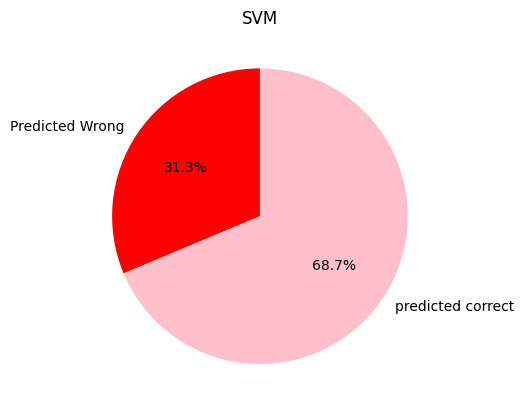

In [ ]:
comp1 = [93.99,206.01]
l1 = ['Predicted Wrong', 'predicted correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%', startangle=90,colors=['red','pink'])
plt.title('SVM')
plt.show()

###For NB

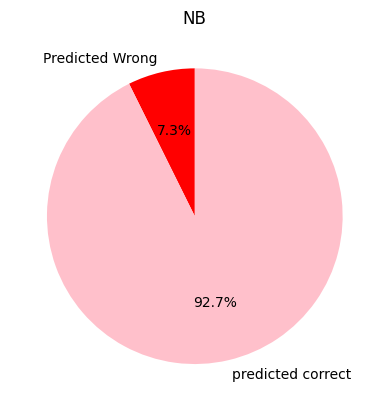

In [ ]:
comp2 = [21.99,278.01]
l1 = ['Predicted Wrong', 'predicted correct']
plt.pie(comp2,labels=l1,autopct='%0.1f%%', startangle=90,colors=['red','pink'])
plt.title('NB')
plt.show()

###For LR

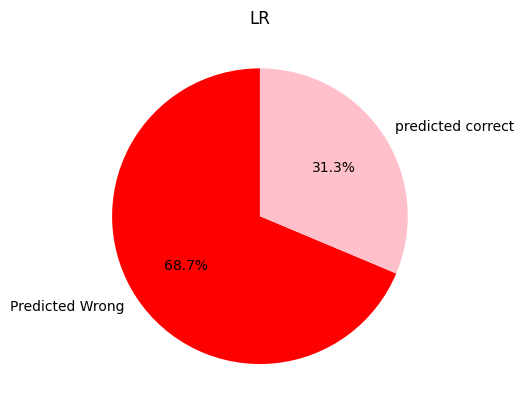

In [ ]:
comp3 = [206.01,93.99]
l1 = ['Predicted Wrong', 'predicted correct']
plt.pie(comp3,labels=l1,autopct='%0.1f%%', startangle=90,colors=['red','pink'])
plt.title('LR')
plt.show()

###DT

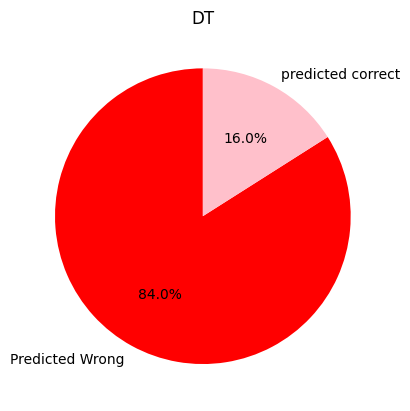

In [ ]:
comp4 = [252,48]
l1 = ['Predicted Wrong', 'predicted correct']
plt.pie(comp4,labels=l1,autopct='%0.1f%%', startangle=90,colors=['red','pink'])
plt.title('DT')
plt.show()

###KNN


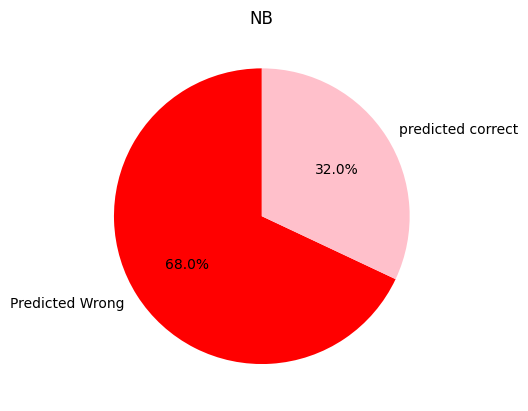

In [ ]:
comp5 = [204,96]
l1 = ['Predicted Wrong', 'predicted correct']
plt.pie(comp5,labels=l1,autopct='%0.1f%%', startangle=90,colors=['red','pink'])
plt.title('NB')
plt.show()

#K-Fold Cross Validation For Age

In [ ]:
algo_score_k_fold = []
algo_name_k_fold = []
algo_score_k_fold_train = []
algo_score_k_fold_dev = []
algo_score_k_fold_test = []

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a dataFrame to compare performance of Classifier Models
classifiers_compare = pd.DataFrame()

##For SVM

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                           tokenizer = identity, ngram_range = (2,5))
  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='char',
                           tokenizer = identity, ngram_range = (1,1))
  return vec

In [ ]:
# calls the vectorization function
vec = vec_tfidf(tfidf = True)


# combines the vectorizer with the SVM classifier
classifier_count = Pipeline([('vec', vec),
                       ('cls', SVC(kernel='poly'))])


# fit classifier to training set
svm = classifier_count.fit(train_data, train_age_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# svmcs = cross_val_score(svm, train_data, new_gender_label, scoring = 'r2', cv=10)
train_scores = cross_val_score(classifier_count, train_data, train_age_labels, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("SVM")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
svmPredictDev = cross_val_predict(classifier_count, dev_data, dev_age_labels)
# print(svmPredictDev)
dev_scores = cross_val_score(classifier_count, dev_data, dev_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
svmPredictTest = cross_val_predict(classifier_count, test_data, test_age_labels)
# print(svmPredictTest)
test_scores = cross_val_score(classifier_count, test_data, test_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["SVM", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["SVM",(test_scores.mean())]])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Percent accuracy within each fold:

[0.80392157 0.47058824 0.54901961 0.60784314 0.66666667 0.47058824
 0.70588235 0.54901961 0.66       0.58      ]

Mean accuracy:
0.6063529411764705


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Percent accuracy within each fold:

[0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
 0.43333333 0.4        0.4        0.4       ]

Mean accuracy:
0.42333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

Percent accuracy within each fold:

[0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
 0.43333333 0.4        0.4        0.4       ]

Mean accuracy:
0.42333333333333334


<ipython-input-34-1f6adb1cb5ca>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_compare = classifiers_compare.append([["SVM", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
<ipython-input-34-1f6adb1cb5ca>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  classifiers_compare_his = classifiers_compare.append([["SVM",(test_scores.mean())]])


Confusion matrix, without normalization
[[ 16  27   0   0]
 [  0 127   0   0]
 [  0  38  44   0]
 [  0  37   0  11]]
Normalized confusion matrix
[[0.37209302 0.62790698 0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.46341463 0.53658537 0.        ]
 [0.         0.77083333 0.         0.22916667]]


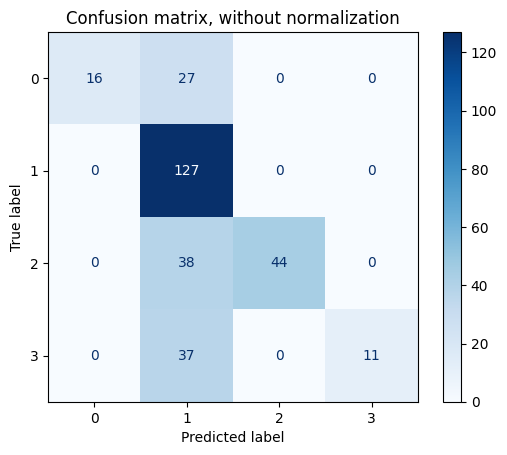

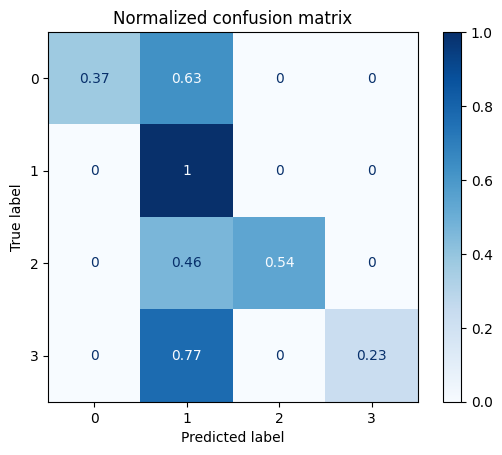

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm,
        test_data,
        test_age_labels,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##For NB

In [ ]:
def vec_tfidf(tfidf = True):

  if tfidf:
    vec = TfidfVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (2,4))

  else:
    vec = CountVectorizer(preprocessor = identity, analyzer='word',
                          tokenizer = identity, ngram_range = (2,3))
  return vec

In [ ]:
#######   CHAR Analyzer     #######
vec = vec_tfidf(tfidf = False)
 # combines the vectorizer with the Naive Bayes classifier
classifier = Pipeline([('vec', vec),
                         ('cls',MultinomialNB())])
# fit classifier to training set

nb = classifier.fit(train_data, train_age_labels)


In [ ]:
# svmcs = cross_val_score(svm, train_data, new_gender_label, scoring = 'r2', cv=10)
train_scores = cross_val_score(nb,train_data, train_age_labels, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("NB")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
svmPredictDev = cross_val_predict(classifier, dev_data , dev_age_labels)
# print(svmPredictDev)
dev_scores = cross_val_score(nb, dev_data, dev_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
svmPredictTest = cross_val_predict(classifier, test_data, test_age_labels)
# print(svmPredictTest)
test_scores = cross_val_score(nb, test_data, test_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["NB", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["NB",(test_scores.mean())]])

Percent accuracy within each fold:

[0.76470588 0.98039216 0.98039216 1.         0.76470588 0.74509804
 0.76470588 0.76470588 0.74       0.74      ]

Mean accuracy:
0.8244705882352941
Percent accuracy within each fold:

[0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
 0.43333333 0.4        0.4        0.4       ]

Mean accuracy:
0.42333333333333334
Percent accuracy within each fold:

[0.43333333 0.43333333 0.43333333 0.43333333 0.43333333 0.43333333
 0.43333333 0.4        0.4        0.4       ]

Mean accuracy:
0.42333333333333334


In [ ]:
nbCScore = cross_val_score(nb, train_data, train_age_labels, scoring = 'accuracy', cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extr

In [ ]:
mnb = MultinomialNB()

scores = cross_val_score(mnb, train_data, train_age_labels, cv = 10, scoring="accuracy")

print("Percent accuracy within each fold:\n")
print(scores)
print("\nMean accuracy:\n")
print(scores.mean())

classifiers_compare = classifiers_compare.append([["MultinomialNB", (scores.mean())]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = numpy.asarray(array, order=order, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:185: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

##For DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini', splitter="random", max_depth = 6)
dt = dtc.fit(padded_train_doc, array_age_label_reshaped)
train_scores = cross_val_score(dt, padded_train_doc, array_age_label_reshaped, cv = 10, scoring="accuracy")
train_scores
#  DecisionTreeClassifier(criterion = 'entropy', splitter="random", max_depth = 4) classifier.fit(padded_train_doc,  array_gender_label_reshaped)
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())

# algo_name_k_fold.append("Decision Tree")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
dtPredictDev = cross_val_predict(dtc, padded_dev_doc, dev_age_labels)
print(dtPredictDev)
dev_scores = cross_val_score(dt, padded_dev_doc, dev_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
dtPredictTest = cross_val_predict(dtc, padded_test_doc, test_age_labels)
print(dtPredictTest)
test_scores = cross_val_score(dt, padded_test_doc, test_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["DecisionTree", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["DecisionTree",(test_scores.mean())]])

Percent accuracy within each fold:

[0.33333333 0.25490196 0.2745098  0.41176471 0.39215686 0.39215686
 0.50980392 0.41176471 0.48       0.44      ]

Mean accuracy:
0.39003921568627453
[1 2 2 1 2 1 1 1 1 1 1 2 3 2 2 3 1 2 1 2 3 0 1 1 1 2 1 2 1 1 3 1 1 1 1 3 2
 0 1 3 3 2 2 1 3 1 1 2 3 1 2 2 1 2 1 1 3 3 1 1 2 2 2 1 2 1 1 1 1 1 1 1 2 1
 1 2 2 2 1 2 1 0 1 1 1 1 2 1 2 1 1 1 2 1 1 0 1 1 3 2 0 1 2 2 0 1 2 0 2 1 1
 2 1 1 1 2 1 1 1 1 1 1 1 2 2 1 2 0 1 1 1 1 2 1 3 1 2 3 1 2 1 1 2 1 2 1 2 3
 2 3 1 1 1 1 1 3 1 0 2 1 1 1 2 1 1 1 2 2 1 1 1 1 0 1 2 1 1 1 0 0 0 2 1 1 2
 1 3 2 1 1 2 2 2 0 1 1 2 1 1 1 1 1 1 2 0 2 1 1 0 1 1 1 1 1 1 2 1 2 0 1 1 1
 1 1 1 2 1 1 0 2 1 2 1 1 1 1 1 3 1 1 1 1 1 2 2 1 1 1 1 1 0 3 1 2 0 2 2 2 1
 2 1 1 2 1 0 1 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 2 1 3 1 1 2 1 1 2 0 1
 1 1 2 1]
Percent accuracy within each fold:

[0.23333333 0.43333333 0.23333333 0.33333333 0.26666667 0.26666667
 0.26666667 0.36666667 0.46666667 0.3       ]

Mean accuracy:
0.31666666666666665
[1 2 0 1 1 2 1 1 0 2

##For KNN

In [ ]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
k_range = range(1,30)
k_scores = []
# n_neighbors = 5, metric = 'minkowski', p = 2
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,metric = 'minkowski', p = 2)
    scores = cross_val_score(knn, padded_train_doc, array_age_label_reshaped, cv = 10,
                             scoring="accuracy")
    k_scores.append(scores.mean())


Text(0, 0.5, 'Cross-Validated Accuracy')

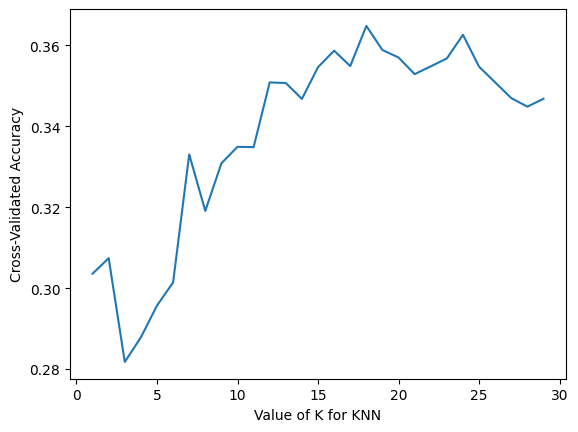

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [ ]:
# search for an optimal value of K for KNN
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn = knnc.fit(padded_train_doc,array_age_label_reshaped)
train_scores = cross_val_score(knn, padded_train_doc, array_age_label_reshaped, cv = 10, scoring = "accuracy")
train_scores
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:")
print(train_scores.mean())
# algo_name_k_fold.append("K-Nearest Neighbour")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
knnPredictDev = cross_val_predict(knnc, padded_dev_doc, dev_age_labels)
print(knnPredictDev)
dev_scores = cross_val_score(knn, padded_dev_doc, dev_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
knnPredictTest = cross_val_predict(knnc, padded_test_doc, test_age_labels)
print(knnPredictTest)
test_scores = cross_val_score(knn, padded_test_doc, test_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["K-Nearest Neighbour", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["K-Nearest Neighbour",(dev_scores.mean())]])


Percent accuracy within each fold:

[0.21568627 0.2745098  0.23529412 0.23529412 0.23529412 0.2745098
 0.37254902 0.37254902 0.4        0.42      ]

Mean accuracy:
0.3035686274509804
[1 0 1 2 1 1 0 1 2 0 1 2 1 1 0 3 2 0 1 2 2 1 3 0 3 3 3 0 1 3 1 3 1 1 1 1 1
 2 2 3 2 1 3 1 1 1 1 1 2 2 1 0 1 3 3 1 2 3 1 1 3 0 3 1 3 3 2 2 1 2 3 1 1 0
 3 2 3 0 1 2 1 1 1 0 2 3 0 1 0 3 1 1 1 1 1 3 1 2 2 1 1 0 3 2 1 1 1 2 1 2 2
 1 1 1 1 2 1 3 1 3 1 2 0 1 3 1 1 1 3 1 2 0 2 1 1 3 1 2 1 0 2 2 1 1 2 1 2 2
 1 3 1 1 1 1 1 1 1 0 0 1 1 1 3 3 2 1 2 1 2 1 1 3 1 1 2 2 1 1 3 1 0 3 1 2 0
 1 2 2 1 1 1 3 1 3 1 3 2 1 1 1 2 1 2 1 0 0 0 1 1 2 2 1 1 1 1 2 0 2 1 1 1 3
 0 1 1 2 0 1 1 1 2 1 3 3 3 1 2 2 3 2 2 1 1 0 2 1 1 2 1 3 0 2 1 2 3 0 2 2 2
 2 3 2 0 1 3 1 0 0 1 2 2 0 1 3 3 3 1 1 2 1 1 1 1 1 1 1 1 3 0 1 1 0 1 2 3 3
 1 1 1 0]
Percent accuracy within each fold:

[0.33333333 0.23333333 0.3        0.3        0.4        0.36666667
 0.46666667 0.3        0.43333333 0.33333333]

Mean accuracy:
0.3466666666666666
[0 0 3 1 1 0 0 2 1 3 3 

##For LR

In [ ]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', max_iter=1)
lr = lrc.fit(padded_train_doc,train_age_labels)
train_scores = cross_val_score(lr, padded_train_doc, train_age_labels, cv = 10, scoring="accuracy")
train_scores
print("Percent accuracy within each fold:\n")
print(train_scores)
print("\nMean accuracy:\n")
print(train_scores.mean())
# algo_name_k_fold.append("Logistric Regression")
# algo_score_k_fold_train.append(train_scores.mean())
############# Dev Data ############
lrPredictDev = cross_val_predict(lrc, padded_dev_doc, dev_age_labels)
print(lrPredictDev)
dev_scores = cross_val_score(lr, padded_dev_doc, dev_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(dev_scores)
print("\nMean accuracy:")
print(dev_scores.mean())
# algo_score_k_fold_dev.append(dev_scores.mean())
############# Test Data ############
lrPredictTest = cross_val_predict(lrc, padded_test_doc, test_age_labels)
print(lrPredictTest)
test_scores = cross_val_score(lr, padded_test_doc, test_age_labels, cv=10)
print("Percent accuracy within each fold:\n")
print(test_scores)
print("\nMean accuracy:")
print(test_scores.mean())
# algo_score_k_fold_test.append(test_scores.mean())
# Compare Classifier For accuracy table
classifiers_compare = classifiers_compare.append([["Logistric Regression", (train_scores.mean()), (dev_scores.mean()), (test_scores.mean())]])
# Compare Classifier For Histogram
classifiers_compare_his = classifiers_compare.append([["Logistric Regression",(dev_scores.mean())]])

Percent accuracy within each fold:

[0.31372549 0.37254902 0.23529412 0.45098039 0.49019608 0.54901961
 0.54901961 0.66666667 0.54       0.56      ]

Mean accuracy:

0.47274509803921577
[1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 0 1 2 2 2 0 2 1 1 2 1 1 1 3 1 1 1 2 1 1 3
 0 1 2 1 1 2 2 1 1 1 1 1 2 3 0 1 1 1 1 3 1 1 0 1 1 1 2 1 1 1 2 1 2 1 1 1 1
 1 3 1 2 1 1 1 1 1 2 0 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 2 1 1 2 1 0 2 1 0 0
 1 1 0 1 2 1 1 0 1 1 3 0 2 3 1 1 1 0 1 1 0 2 1 3 2 3 1 1 1 2 0 2 1 1 1 1 1
 2 1 1 1 0 2 1 1 1 1 3 1 1 1 3 2 2 1 1 1 0 1 0 1 2 2 2 2 1 2 1 2 1 2 2 2 3
 0 2 2 1 2 1 2 1 1 1 0 1 2 2 0 2 0 1 2 1 2 1 1 2 2 1 0 1 1 1 1 1 2 1 1 1 1
 0 1 0 1 0 1 0 1 1 2 1 1 2 1 1 1 1 2 1 2 0 1 2 1 3 2 2 2 0 1 1 1 2 1 1 2 1
 3 0 0 2 0 2 1 2 2 1 1 1 1 0 0 2 1 0 1 0 0 1 1 0 0 1 3 0 2 1 0 1 0 0 2 2 1
 0 1 1 2]
Percent accuracy within each fold:

[0.26666667 0.4        0.43333333 0.33333333 0.26666667 0.3
 0.43333333 0.33333333 0.3        0.33333333]

Mean accuracy:
0.33999999999999997
[2 1 1 1 2 1 2 1 2 1 0 2 3